In [1]:
!pip install tensorflow 
!pip install keras.models
!pip install keras.datasets

### Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.10.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1 - Load the dataset

In [4]:
# Train and test split
from tensorflow.keras.datasets import mnist
(trainX, trainy), (testX, testy) = mnist.load_data()

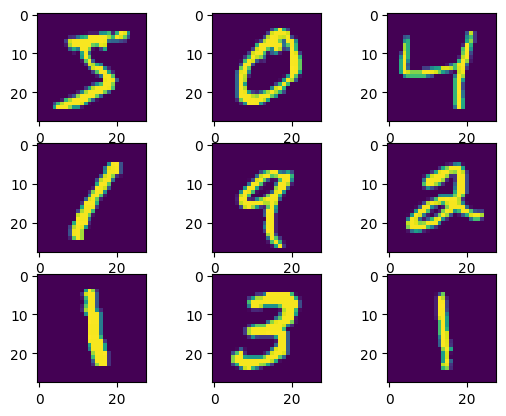

In [5]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i])
plt.show()

In [6]:
# reshape the data to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [7]:
# one hot encoding
# Label Encoder 
  # Red, Green, Blue
  # Red = 0
  # Green = 1
  # Blue = 2
# One Hot Encoder
# Red Blue  Green
# 1    0     0
# 0    1     0
# 1    0     0
# 0    0     1
# How many classes do we have ? -- 10 classes
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [8]:
# normalize the values
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
trainX = train_norm / 255.0
testX = test_norm / 255.0

### Step 2 - Building a model

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, 
        (3, 3), 
        activation='relu', 
        kernel_initializer='he_uniform', 
        input_shape=(28, 28, 1)
    ),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        100, 
        activation='relu', 
        kernel_initializer='he_uniform'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
opt = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
h = model.fit(
    trainX,
    trainy,
    epochs=10,
    batch_size=32, 
    validation_data=(testX, testy)
)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1722 - accuracy: 0.9472 - val_loss: 0.0827 - val_accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0442 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.0406 - val_accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0120 - accuracy: 0.9966 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0071 - accuracy: 0.9983 - val_loss: 0.0379 -

### Step 3 - Evaluation

In [14]:
loss, accuracy = model.evaluate(testX, testy)
print("Loss: ", loss * 100)
print("Accuracy: ", accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9883
Loss:  4.196110367774963
Accuracy:  98.83000254631042


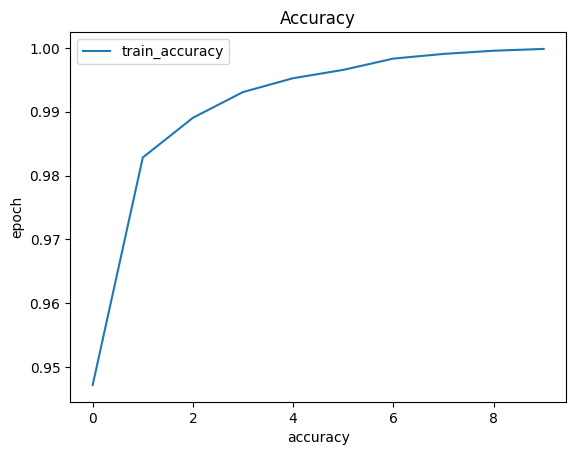

In [15]:
plt.plot(h.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train_accuracy'])

In [16]:
y_pred = model.predict(testX)

313/313 [==============================] - 1s 3ms/step


The number is  9


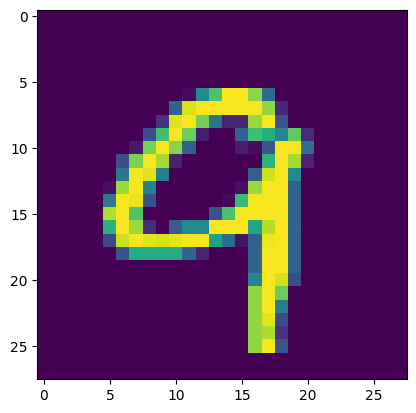

In [17]:
import random
random_index = random.randint(0, len(testy))

print("The number is ", np.argmax(y_pred[random_index]))
plt.imshow(testX[random_index])
plt.show()